El sector de Marketing, para tener en cuenta en el envío de campañas, requiere poder realizar una segmentación de clientes, para poder entender sus preferencias y enfocar mejor las campañas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
from IPython.display import clear_output

Se utiliza el archivo de ventas procesado:

In [3]:
df_ventas = pd.read_csv("../Datasets/Venta_Procesado.csv", sep=",")

In [4]:
df_ventas.head()

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad,MinPrecio,MaxPrecio,MinCantidad,MaxCantidad,Calidad_Precio,Calidad_Cantidad,Venta,Fecha_Año,Fecha_Mes,Fecha_Periodo
0,1,2018-03-09,2018-03-17,3,969,13,1674,42817,813.12,2.0,813.12,813.12,0.000,5.000,Sin errores,Sin errores,1626.24,2018,3,201803
1,2,2018-12-28,2018-12-29,2,884,13,1674,42795,543.18,3.0,543.18,543.18,0.875,3.125,Sin errores,Sin errores,1629.54,2018,12,201812
2,3,2016-03-28,2016-03-31,2,1722,13,1674,42837,430.32,1.0,430.32,430.32,0.000,5.000,Sin errores,Sin errores,430.32,2016,3,201603
3,4,2017-10-23,2017-10-24,3,2876,13,1674,42834,818.84,2.0,818.84,818.84,0.500,3.500,Sin errores,Sin errores,1637.68,2017,10,201710
4,5,2017-11-22,2017-11-25,2,678,13,1674,42825,554.18,3.0,554.18,554.18,0.000,5.000,Sin errores,Sin errores,1662.54,2017,11,201711


In [5]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46645 entries, 0 to 46644
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IdVenta           46645 non-null  int64  
 1   Fecha             46645 non-null  object 
 2   Fecha_Entrega     46645 non-null  object 
 3   IdCanal           46645 non-null  int64  
 4   IdCliente         46645 non-null  int64  
 5   IdSucursal        46645 non-null  int64  
 6   IdEmpleado        46645 non-null  int64  
 7   IdProducto        46645 non-null  int64  
 8   Precio            45721 non-null  float64
 9   Cantidad          45753 non-null  float64
 10  MinPrecio         46645 non-null  float64
 11  MaxPrecio         46645 non-null  float64
 12  MinCantidad       46645 non-null  float64
 13  MaxCantidad       46645 non-null  float64
 14  Calidad_Precio    46645 non-null  object 
 15  Calidad_Cantidad  46645 non-null  object 
 16  Venta             44845 non-null  float6

Se filtran solo los registros sin errores:

In [6]:
df_ventas = df_ventas[(df_ventas['Calidad_Precio'] == 'Sin errores') & (df_ventas['Calidad_Cantidad'] == 'Sin errores')]

In [7]:
df_ventas.shape

(39792, 20)

Se dejan las columnas que se van a utilizar, pero salvando Ids de Cliente y Sucursal todavía:

In [8]:
df_ventas.drop(['IdVenta','Fecha','Fecha_Año','Fecha_Mes','IdProducto','Fecha_Entrega','IdEmpleado','MinPrecio','MaxPrecio','MinCantidad','MaxCantidad','Calidad_Precio','Calidad_Cantidad','Venta','Fecha_Periodo'], axis=1,inplace=True)

In [9]:
df_ventas.head()

,IdCanal,IdCliente,IdSucursal,Precio,Cantidad
0,3,969,13,813.12,2.0
1,2,884,13,543.18,3.0
2,2,1722,13,430.32,1.0
3,3,2876,13,818.84,2.0
4,2,678,13,554.18,3.0


Se lee el maestro de Clientes para obtener la latitud, longitud y edad

In [12]:
df_clientes = pd.read_csv("../Datasets/Clientes.csv", sep=";")

In [13]:
df_clientes.drop(['Provincia','Nombre_y_Apellido','Domicilio','Telefono','Localidad','col10'], axis=1,inplace=True)

Se lee el maestro de Sucursales para obtener latitud y longitud

In [14]:
df_sucursales = pd.read_csv("../Datasets/Sucursales.csv", sep=";")

In [15]:
df_sucursales.drop(['Provincia','Sucursal','Direccion','Localidad'], axis=1,inplace=True)

In [16]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3407 entries, 0 to 3406
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      3407 non-null   int64 
 1   Edad    3407 non-null   int64 
 2   X       3345 non-null   object
 3   Y       3347 non-null   object
dtypes: int64(2), object(2)
memory usage: 106.6+ KB


In [17]:
df_sucursales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        31 non-null     int64 
 1   Latitud   31 non-null     object
 2   Longitud  31 non-null     object
dtypes: int64(1), object(2)
memory usage: 872.0+ bytes


Se puede utilizar la biblioteca Geopy para obtener la distancia entre el cliente y la sucursal:
    !pip install geopy

In [21]:
from geopy.distance import geodesic

Se trabaja sobre los dataframes maestros de clientes y sucursales para adecuar nombres de campos y tipos de datos, tambien para hacer tratamiento sobre valores faltantes

In [22]:
df_sucursales.rename(columns = {'ID': 'IdSucursal', 'Latitud': 'Lat_Sucursal', 'Longitud': 'Lon_Sucursal'}, inplace = True)

In [23]:
df_sucursales['Lat_Sucursal'] = df_sucursales.apply(lambda row: str(row['Lat_Sucursal']).replace(',','.'), axis=1)
df_sucursales['Lon_Sucursal'] = df_sucursales.apply(lambda row: str(row['Lon_Sucursal']).replace(',','.'), axis=1)

In [24]:
df_sucursales = df_sucursales.astype({"Lat_Sucursal": np.float16, "Lon_Sucursal": np.float16})

In [25]:
df_sucursales.describe()

,IdSucursal,Lat_Sucursal,Lon_Sucursal
count,31.000000,31.000000,31.000000
mean,16.000000,-34.250000,-60.375000
std,9.092121,2.347656,3.753906
min,1.000000,-41.125000,-71.312500
25%,8.500000,-34.656250,-60.687500
50%,16.000000,-34.625000,-58.468750
75%,23.500000,-33.734375,-58.406250
max,31.000000,-26.812500,-57.531250


In [26]:
df_clientes.dropna(inplace=True)

In [27]:
df_clientes.shape

(3333, 4)

In [28]:
df_clientes.rename(columns = {'ID': 'IdCliente', 'Y': 'Lat_Cliente', 'X': 'Lon_Cliente'}, inplace = True)

In [29]:
df_clientes['Lat_Cliente'] = df_clientes.apply(lambda row: str(row['Lat_Cliente']).replace(',','.'), axis=1)
df_clientes['Lon_Cliente'] = df_clientes.apply(lambda row: str(row['Lon_Cliente']).replace(',','.'), axis=1)

In [30]:
df_clientes = df_clientes.astype({"Lat_Cliente": np.float16, "Lon_Cliente": np.float16})

In [31]:
df_clientes.describe()

,IdCliente,Edad,Lon_Cliente,Lat_Cliente
count,3333.000000,3333.000000,3333.000000,3333.000000
mean,1710.688269,40.412241,-inf,-inf
std,985.695497,14.577355,14.320312,8.640625
min,1.000000,15.000000,-71.500000,-68.812500
25%,858.000000,28.000000,-60.906250,-34.718750
50%,1721.000000,41.000000,-58.625000,-34.593750
75%,2567.000000,53.000000,-58.437500,-32.937500
max,3407.000000,65.000000,58.843750,34.937500


Como vemos que hay problemas en los datos, es decir, valores de latitud y longitud que no corresponden a Argentina, se procede a hacer correcciones, las cuáles serán de dos tipos:
* Casos donde la latitud y longitud están en positivo
* Casos donde la latitud y longitud están intercambiadas

In [32]:
df_clientes['Lon_Cliente'] = df_clientes['Lon_Cliente'].apply(lambda x: x if x < 0 else x * -1)
df_clientes['Lat_Cliente'] = df_clientes['Lat_Cliente'].apply(lambda x: x if x < 0 else x * -1)

In [33]:
df_clientes.describe()

,IdCliente,Edad,Lon_Cliente,Lat_Cliente
count,3333.000000,3333.000000,3333.000000,3333.000000
mean,1710.688269,40.412241,-60.300119,-34.080202
std,985.695497,14.577355,4.621252,3.609896
min,1.000000,15.000000,-71.500000,-68.812500
25%,858.000000,28.000000,-60.906250,-34.718750
50%,1721.000000,41.000000,-58.656250,-34.593750
75%,2567.000000,53.000000,-58.437500,-32.968750
max,3407.000000,65.000000,-26.734375,-26.593750


In [34]:
df_clientes['Lat_Cliente_Aux'] = df_clientes['Lat_Cliente']

In [37]:
df_clientes['Lat_Cliente'] = df_clientes.apply(lambda row: row['Lat_Cliente'] if row['Lat_Cliente_Aux'] > -55 else row['Lon_Cliente'], axis=1)

In [38]:
df_clientes['Lon_Cliente'] = df_clientes.apply(lambda row: row['Lon_Cliente'] if row['Lat_Cliente_Aux'] > -55 else row['Lat_Cliente_Aux'], axis=1)

In [39]:
df_clientes.describe()

,IdCliente,Edad,Lon_Cliente,Lat_Cliente,Lat_Cliente_Aux
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1710.688269,40.412241,-60.633935,-33.746386,-34.080202
std,985.695497,14.577355,3.563706,1.988432,3.609896
min,1.000000,15.000000,-71.500000,-40.375000,-68.812500
25%,858.000000,28.000000,-63.968750,-34.718750,-34.718750
50%,1721.000000,41.000000,-58.656250,-34.593750,-34.593750
75%,2567.000000,53.000000,-58.437500,-32.968750,-32.968750
max,3407.000000,65.000000,-57.750000,-26.593750,-26.593750


In [35]:
df_clientes.drop(columns=['Lat_Cliente_Aux'], inplace=True)

Se agrega en el dataframe de ventas los datos de geoposición y edad

In [36]:
df_ventas = pd.merge(df_ventas, df_clientes, on='IdCliente', how='left')

In [37]:
df_ventas = pd.merge(df_ventas, df_sucursales, on='IdSucursal', how='left')

In [38]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39792 entries, 0 to 39791
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IdCanal       39792 non-null  int64  
 1   IdCliente     39792 non-null  int64  
 2   IdSucursal    39792 non-null  int64  
 3   Precio        39792 non-null  float64
 4   Cantidad      39792 non-null  float64
 5   Edad          38765 non-null  float64
 6   Lon_Cliente   38765 non-null  float64
 7   Lat_Cliente   38765 non-null  float64
 8   Lat_Sucursal  39792 non-null  float16
 9   Lon_Sucursal  39792 non-null  float16
dtypes: float16(2), float64(5), int64(3)
memory usage: 2.9 MB


Los valores nulos pueden ser descartados o bien imputados con otro valor

In [44]:
#df_ventas['Edad'] = df_ventas['Edad'].fillna(0)
#df_ventas['Lon_Cliente'] = df_ventas['Lon_Cliente'].fillna(0)
#df_ventas['Lat_Cliente'] = df_ventas['Lat_Cliente'].fillna(0)

In [39]:
df_ventas.dropna(inplace=True)
df_ventas.shape

(38765, 10)

Se genera el campo donde va a estar la distancia del cliente con la sucursal, que es la geodésica entre los dos puntos de coordenadas

In [40]:
df_ventas['Dist_Cli_Suc'] = df_ventas.apply(lambda row: geodesic((row['Lat_Cliente'], row['Lon_Cliente']),(row['Lat_Sucursal'], row['Lon_Sucursal'])).km, axis=1)

In [41]:
df_ventas['VentaOnline'] = df_ventas.apply(lambda row: 1 if row['IdCanal'] == 2 else 0, axis=1)

In [42]:
df_ventas['Venta'] = df_ventas['Precio'] * df_ventas['Cantidad']

In [43]:
df_ventas.drop(['IdCanal','IdSucursal','Precio','Cantidad','Lon_Sucursal','Lat_Sucursal'], axis=1, inplace=True)

In [44]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38765 entries, 0 to 39791
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IdCliente     38765 non-null  int64  
 1   Edad          38765 non-null  float64
 2   Lon_Cliente   38765 non-null  float64
 3   Lat_Cliente   38765 non-null  float64
 4   Dist_Cli_Suc  38765 non-null  float64
 5   VentaOnline   38765 non-null  int64  
 6   Venta         38765 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 2.4 MB


In [45]:
df_ventas.head()

,IdCliente,Edad,Lon_Cliente,Lat_Cliente,Dist_Cli_Suc,VentaOnline,Venta
0,969,60.0,-34.81250,-58.28125,3167.366587,0,1626.24
1,884,64.0,-58.31250,-34.78125,30.942664,1,1629.54
2,1722,16.0,-58.81250,-34.65625,23.951147,1,430.32
3,2876,19.0,-68.87500,-32.93750,972.361210,0,1637.68
4,678,37.0,-58.65625,-34.71875,16.313885,1,1662.54


In [46]:
df_cliente_dist = df_ventas.groupby(['IdCliente'])['Dist_Cli_Suc'].mean().reset_index()

In [47]:
df_cliente_vta = df_ventas.groupby(['IdCliente'])['Venta'].sum().reset_index()

In [48]:
df_cliente_onl = df_ventas.groupby(['IdCliente'])['VentaOnline'].mean().reset_index()

In [50]:
df_cliente_cant = df_ventas.groupby(['IdCliente'])['Venta'].count().reset_index()

In [51]:
df_cliente_cant.rename(columns = {'Venta': 'CantVentas'}, inplace = True)

In [52]:
df_cliente = df_ventas[['IdCliente','Edad','Lon_Cliente','Lat_Cliente']].drop_duplicates()

In [53]:
df_cliente.rename(columns = {'Lon_Cliente' : 'Longitud', 'Lat_Cliente' : 'Latitud'}, inplace = True)

In [54]:
df_cliente = pd.merge(df_cliente, df_cliente_dist, on='IdCliente')

In [55]:
df_cliente = pd.merge(df_cliente, df_cliente_vta, on='IdCliente')

In [56]:
df_cliente = pd.merge(df_cliente, df_cliente_onl, on='IdCliente')

In [57]:
df_cliente = pd.merge(df_cliente, df_cliente_cant, on='IdCliente')

In [58]:
del(df_ventas)

In [60]:
del(df_sucursales)

In [59]:
del(df_clientes)

In [61]:
del(df_cliente_dist)

In [62]:
del(df_cliente_vta)

In [63]:
del(df_cliente_onl)

In [64]:
del(df_cliente_cant)

In [65]:
df_cliente.describe()

,IdCliente,Edad,Longitud,Latitud,Dist_Cli_Suc,Venta,VentaOnline,CantVentas
count,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000
mean,1624.626727,40.388122,-60.062139,-34.342752,325.748063,33909.248042,0.455339,13.385704
std,960.037330,14.599569,4.687690,3.551940,478.478807,28362.139705,0.212828,7.935451
min,1.000000,15.000000,-71.500000,-68.812500,0.000000,113.000000,0.000000,1.000000
25%,815.750000,28.000000,-60.625000,-34.718750,26.855477,12725.170000,0.333333,7.000000
50%,1592.500000,41.000000,-58.625000,-34.593750,193.395960,27272.570000,0.450000,13.000000
75%,2415.250000,53.000000,-58.437500,-34.093750,399.038800,47538.935000,0.578947,19.000000
max,3407.000000,65.000000,-26.734375,-26.593750,4589.655623,206206.360000,1.000000,46.000000


Se generan los datos con los que se va a entrenar K-Means para generar los Clústers

In [66]:
X = df_cliente[['Edad','Latitud','Longitud','Dist_Cli_Suc','VentaOnline','Venta','CantVentas']]

In [67]:
from sklearn.cluster import KMeans

In [68]:
from sklearn.metrics import silhouette_samples, silhouette_score

Se Evalua por Distancia media al Centroide y Silhouette

In [69]:
# Preparamos una lista donde vamos a ir agregando las distancias medias
Sum_of_squared_distances = []
# Preparamos una lista donde vamos a ir agregando los valores medios de silhouette
lista_sil = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
K = np.arange(2,10)
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    # Calculamos la distancia media y agregamos a la lista
    distancia_total = km.inertia_ # distancia respecto a su centroide
    distancia_media = np.divide(distancia_total,X.shape[0])
    Sum_of_squared_distances.append(distancia_media)
    
    # Tomamos las etiquetas, todos los cluster
    etiquetas = km.labels_
    
    # Calculamos el silhouette 
    valor_medio_sil = silhouette_score(X, etiquetas) # Esta entre 0 y 1, recomendable que este cerca de 1
    lista_sil.append(valor_medio_sil)

Se grafica la distancia media en función del núemro de clústers.

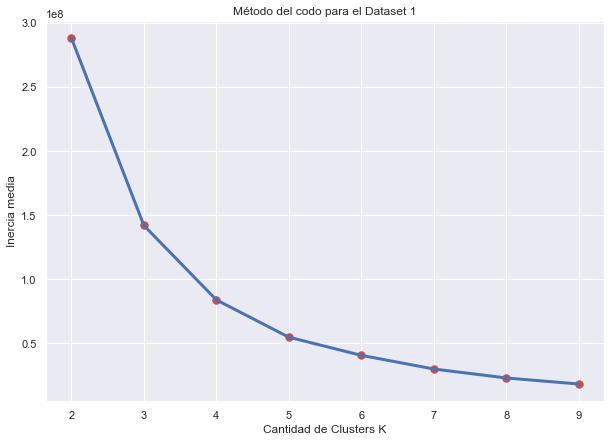

In [70]:
plt.figure(figsize = (10,7))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset 1')

plt.show()
# 4 o 5

Se grafica Silhouette media en función del núemro de clústers.

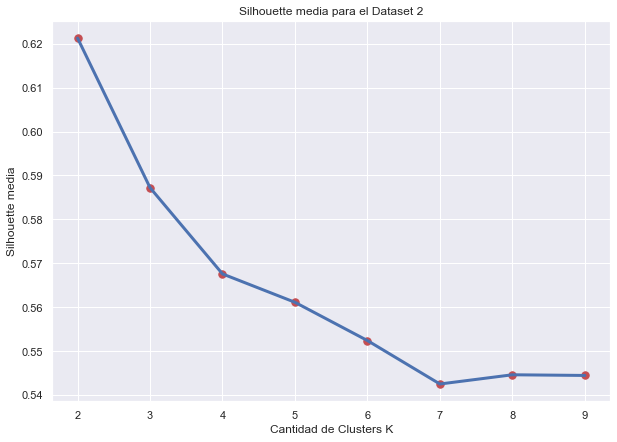

In [71]:
plt.figure(figsize = (10,7))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media para el Dataset 2')

plt.show()

In [72]:
N = 3
km = KMeans(n_clusters=N, random_state=0)

In [73]:
km.fit(X)

KMeans(n_clusters=3, random_state=0)

In [74]:
clusters = pd.DataFrame(data=km.cluster_centers_, columns=['Edad','Latitud','Longitud','Dist_Cli_Suc','VentaOnline','Venta','CantVentas'])

In [75]:
# Valores de los centroides de los 3 cluster
# Vemos que en venta y cant se ven mas diferenciados los cluster
clusters

,Edad,Latitud,Longitud,Dist_Cli_Suc,VentaOnline,Venta,CantVentas
0,39.739865,-34.423406,-60.143581,393.444398,0.443948,96182.817365,23.483108
1,40.590488,-34.319217,-60.064208,279.736608,0.467125,14609.853953,8.739963
2,40.249745,-34.357257,-60.034149,381.257167,0.439326,46970.147645,18.006116


In [ ]:
pd.dataframe(data=km.labels_,)